# Regression with Neural Networks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

## Anatomy of an MLP:  elements of a neural network model

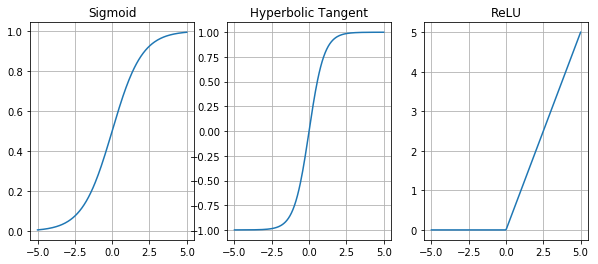

In [2]:
x = np.linspace(-5, 5, 200)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,4))
ax[0].plot(x, 1/(1+np.exp(-x)))
ax[0].set_title('Sigmoid')
     
ax[1].plot(x, np.tanh(x))
ax[1].set_title('Hyperbolic Tangent')

ax[2].plot(x, np.maximum(0, x))
ax[2].set_title('ReLU')

for p in ax:
    p.grid()

## Loading and preparation

In [3]:
DATA_DIR = '../data'
FILE_NAME = 'diamonds.csv'
data_path = os.path.join(DATA_DIR, FILE_NAME)
diamonds = pd.read_csv(data_path)
## Preparation done from Chapter 2
diamonds = diamonds.loc[(diamonds['x']>0) | (diamonds['y']>0)]
diamonds.loc[11182, 'x'] = diamonds['x'].median()
diamonds.loc[11182, 'z'] = diamonds['z'].median()
diamonds = diamonds.loc[~((diamonds['y'] > 30) | (diamonds['z'] > 30))]
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity', drop_first=True)], axis=1)

#### Train-test split

In [4]:
X = diamonds.drop(['cut','color','clarity','price'], axis=1)
y = diamonds['price']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

#### Dimensionality reduction

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(X_train[['x','y','z']])
X_train['dim_index'] = pca.transform(X_train[['x','y','z']]).flatten()
X_train.drop(['x','y','z'], axis=1, inplace=True)

C:\Users\direc\Anaconda3\envs\mybook\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\direc\Anaconda3\envs\mybook\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


#### Standarize

In [7]:
numerical_features = ['carat', 'depth', 'table', 'dim_index']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train.loc[:, numerical_features] = scaler.transform(X_train[numerical_features])

C:\Users\direc\Anaconda3\envs\mybook\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Building the MLP for predicting diamond prices

In [8]:
from keras.models import Sequential
nn_reg = Sequential()

C:\Users\direc\Anaconda3\envs\mybook\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
from keras.layers import Dense

In [10]:
n_input = X_train.shape[1]
n_hidden1 = 32
# first hidden layer
nn_reg.add(Dense(units=n_hidden1, activation='relu', input_shape=(n_input,)))

In [11]:
n_hidden2 = 16
n_hidden3 = 8
# add second hidden layer
nn_reg.add(Dense(units=n_hidden2, activation='relu'))
# add third hidden layer
nn_reg.add(Dense(units=n_hidden3, activation='relu'))

In [12]:
# output layer
nn_reg.add(Dense(units=1, activation=None))

In [13]:
nn_reg.predict(X_train.iloc[:5,:])

array([[ 0.04266632],
       [-0.02656533],
       [ 0.24695258],
       [ 0.0238365 ],
       [ 0.06252444]], dtype=float32)

## Training the neural network

In [14]:
## compiling step
nn_reg.compile(loss='mean_squared_error', optimizer='adam')

In [15]:
nn_reg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                704       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [16]:
batch_size = 64
n_epochs = 50
nn_reg.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size)

Epoch 1/50
48537/48537 [==============================] - 1s 17us/step - loss: 14847084.0002
Epoch 2/50
48537/48537 [==============================] - 1s 12us/step - loss: 1650010.2439
Epoch 3/50
48537/48537 [==============================] - 1s 12us/step - loss: 1132889.1603
Epoch 4/50
48537/48537 [==============================] - 1s 12us/step - loss: 941221.0584
Epoch 5/50
48537/48537 [==============================] - 1s 11us/step - loss: 820140.3761
Epoch 6/50
48537/48537 [==============================] - 1s 11us/step - loss: 743936.7084
Epoch 7/50
48537/48537 [==============================] - 1s 11us/step - loss: 693411.4133 0s - l - ETA: 0s - loss: 689722.33
Epoch 8/50
48537/48537 [==============================] - 1s 11us/step - loss: 654896.4973
Epoch 9/50
48537/48537 [==============================] - 1s 11us/step - loss: 621472.0390
Epoch 10/50
48537/48537 [==============================] - 1s 11us/step - loss: 591104.1300
Epoch 11/50
48537/48537 [=========================

### Transform and scale the testing dataset

In [17]:
## PCA for dimentionality reduction:
X_test['dim_index'] = pca.transform(X_test[['x','y','z']]).flatten()
X_test.drop(['x','y','z'], axis=1, inplace=True)
## Scale our numerical features so they have zero mean and a variance of one
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

C:\Users\direc\Anaconda3\envs\mybook\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\direc\Anaconda3\envs\mybook\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\direc\Anaconda3\envs\mybook\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

In [18]:
from sklearn.metrics import mean_squared_error
y_pred_train = nn_reg.predict(X_train)
y_pred_test = nn_reg.predict(X_test)
train_mse = mean_squared_error(y_true=y_train, y_pred=y_pred_train)
test_mse = mean_squared_error(y_true=y_test, y_pred=y_pred_test)
print("Train MSE: {:0.3f} \nTest MSE: {:0.3f}".format(train_mse/1e6, test_mse/1e6))

Train MSE: 0.316 
Test MSE: 0.326


### Regularization

In [19]:
nn_reg2 = Sequential()
n_hidden = 64
# hidden layers
nn_reg2.add(Dense(units=n_hidden, activation='relu', input_shape=(n_input,)))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
# output layer
nn_reg2.add(Dense(units=1, activation=None))

In [20]:
nn_reg2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])

In [21]:
nn_reg2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                1408      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total para

In [22]:
batch_size = 64
n_epochs = 300
history = nn_reg2.fit(X_train, y_train,
                      epochs=n_epochs,
                      batch_size=batch_size,
                      validation_split=0.1)

Train on 43683 samples, validate on 4854 samples
Epoch 1/300
43683/43683 [==============================] - 1s 27us/step - loss: 4292592.8383 - mean_squared_error: 4292592.8383 - mean_absolute_error: 991.7444 - val_loss: 875994.5605 - val_mean_squared_error: 875994.5605 - val_mean_absolute_error: 475.6479
Epoch 2/300
43683/43683 [==============================] - 1s 18us/step - loss: 700351.8185 - mean_squared_error: 700351.8185 - mean_absolute_error: 436.9139 - val_loss: 650639.5746 - val_mean_squared_error: 650639.5746 - val_mean_absolute_error: 423.1706
Epoch 3/300
43683/43683 [==============================] - 1s 17us/step - loss: 547684.9676 - mean_squared_error: 547684.9676 - mean_absolute_error: 394.5040 - val_loss: 505167.5236 - val_mean_squared_error: 505167.5236 - val_mean_absolute_error: 377.1472
Epoch 4/300
43683/43683 [==============================] - 1s 17us/step - loss: 451928.3013 - mean_squared_error: 451928.3013 - mean_absolute_error: 369.0824 - val_loss: 563220.2056

Epoch 33/300
43683/43683 [==============================] - 1s 16us/step - loss: 301733.6106 - mean_squared_error: 301733.6106 - mean_absolute_error: 301.2029 - val_loss: 322727.9048 - val_mean_squared_error: 322727.9048 - val_mean_absolute_error: 305.7510
Epoch 34/300
43683/43683 [==============================] - 1s 16us/step - loss: 298780.3106 - mean_squared_error: 298780.3106 - mean_absolute_error: 299.5540 - val_loss: 349982.1332 - val_mean_squared_error: 349982.1332 - val_mean_absolute_error: 308.8772
Epoch 35/300
43683/43683 [==============================] - 1s 17us/step - loss: 302769.5348 - mean_squared_error: 302769.5348 - mean_absolute_error: 301.0200 - val_loss: 320525.5455 - val_mean_squared_error: 320525.5455 - val_mean_absolute_error: 304.9789
Epoch 36/300
43683/43683 [==============================] - 1s 16us/step - loss: 302760.2721 - mean_squared_error: 302760.2721 - mean_absolute_error: 300.5522 - val_loss: 375372.1213 - val_mean_squared_error: 375372.1213 - val_me

Epoch 65/300
43683/43683 [==============================] - 1s 16us/step - loss: 283710.7150 - mean_squared_error: 283710.7150 - mean_absolute_error: 289.5656 - val_loss: 308062.1341 - val_mean_squared_error: 308062.1341 - val_mean_absolute_error: 288.6037
Epoch 66/300
43683/43683 [==============================] - 1s 16us/step - loss: 282951.5501 - mean_squared_error: 282951.5501 - mean_absolute_error: 289.5953 - val_loss: 343211.9587 - val_mean_squared_error: 343211.9587 - val_mean_absolute_error: 325.4067
Epoch 67/300
43683/43683 [==============================] - 1s 16us/step - loss: 280418.0254 - mean_squared_error: 280418.0254 - mean_absolute_error: 287.1502 - val_loss: 306794.4181 - val_mean_squared_error: 306794.4181 - val_mean_absolute_error: 293.2437
Epoch 68/300
43683/43683 [==============================] - 1s 17us/step - loss: 282411.3606 - mean_squared_error: 282411.3606 - mean_absolute_error: 288.7339 - val_loss: 314382.6687 - val_mean_squared_error: 314382.6687 - val_me

Epoch 97/300
43683/43683 [==============================] - 1s 16us/step - loss: 273062.6530 - mean_squared_error: 273062.6530 - mean_absolute_error: 285.2492 - val_loss: 342752.8240 - val_mean_squared_error: 342752.8240 - val_mean_absolute_error: 316.1784
Epoch 98/300
43683/43683 [==============================] - 1s 16us/step - loss: 273367.8311 - mean_squared_error: 273367.8311 - mean_absolute_error: 283.3319 - val_loss: 307297.2344 - val_mean_squared_error: 307297.2344 - val_mean_absolute_error: 287.7501
Epoch 99/300
43683/43683 [==============================] - 1s 16us/step - loss: 272750.4202 - mean_squared_error: 272750.4202 - mean_absolute_error: 283.9565 - val_loss: 366412.7521 - val_mean_squared_error: 366412.7521 - val_mean_absolute_error: 340.0550
Epoch 100/300
43683/43683 [==============================] - 1s 16us/step - loss: 271623.6977 - mean_squared_error: 271623.6977 - mean_absolute_error: 283.0291 - val_loss: 315138.9928 - val_mean_squared_error: 315138.9928 - val_m

Epoch 129/300
43683/43683 [==============================] - 1s 16us/step - loss: 263327.2386 - mean_squared_error: 263327.2386 - mean_absolute_error: 280.1397 - val_loss: 319441.4653 - val_mean_squared_error: 319441.4653 - val_mean_absolute_error: 294.4422
Epoch 130/300
43683/43683 [==============================] - 1s 16us/step - loss: 256553.5550 - mean_squared_error: 256553.5550 - mean_absolute_error: 278.0765 - val_loss: 309868.0886 - val_mean_squared_error: 309868.0886 - val_mean_absolute_error: 287.2553
Epoch 131/300
43683/43683 [==============================] - 1s 16us/step - loss: 256912.1851 - mean_squared_error: 256912.1851 - mean_absolute_error: 277.6151 - val_loss: 310025.0237 - val_mean_squared_error: 310025.0237 - val_mean_absolute_error: 289.8341
Epoch 132/300
43683/43683 [==============================] - 1s 16us/step - loss: 261081.1899 - mean_squared_error: 261081.1899 - mean_absolute_error: 278.5121 - val_loss: 318471.5887 - val_mean_squared_error: 318471.5887 - va

Epoch 161/300
43683/43683 [==============================] - 1s 16us/step - loss: 246168.9048 - mean_squared_error: 246168.9048 - mean_absolute_error: 269.8812 - val_loss: 323015.7292 - val_mean_squared_error: 323015.7292 - val_mean_absolute_error: 296.7269
Epoch 162/300
43683/43683 [==============================] - 1s 16us/step - loss: 247082.8963 - mean_squared_error: 247082.8963 - mean_absolute_error: 271.8707 - val_loss: 315671.9925 - val_mean_squared_error: 315671.9925 - val_mean_absolute_error: 297.9441
Epoch 163/300
43683/43683 [==============================] - 1s 17us/step - loss: 245077.3367 - mean_squared_error: 245077.3367 - mean_absolute_error: 269.7068 - val_loss: 309374.8723 - val_mean_squared_error: 309374.8723 - val_mean_absolute_error: 291.3982
Epoch 164/300
43683/43683 [==============================] - 1s 17us/step - loss: 248373.1101 - mean_squared_error: 248373.1101 - mean_absolute_error: 270.1588 - val_loss: 361076.7278 - val_mean_squared_error: 361076.7278 - va

Epoch 193/300
43683/43683 [==============================] - 1s 16us/step - loss: 243335.0680 - mean_squared_error: 243335.0680 - mean_absolute_error: 268.5113 - val_loss: 333147.5242 - val_mean_squared_error: 333147.5242 - val_mean_absolute_error: 301.4277
Epoch 194/300
43683/43683 [==============================] - 1s 17us/step - loss: 240601.7877 - mean_squared_error: 240601.7877 - mean_absolute_error: 268.4247 - val_loss: 317113.0711 - val_mean_squared_error: 317113.0711 - val_mean_absolute_error: 297.2855
Epoch 195/300
43683/43683 [==============================] - 1s 16us/step - loss: 239060.2152 - mean_squared_error: 239060.2152 - mean_absolute_error: 266.9834 - val_loss: 313689.9962 - val_mean_squared_error: 313689.9962 - val_mean_absolute_error: 289.6975
Epoch 196/300
43683/43683 [==============================] - 1s 17us/step - loss: 240147.9814 - mean_squared_error: 240147.9814 - mean_absolute_error: 268.5517 - val_loss: 309294.0860 - val_mean_squared_error: 309294.0860 - va

Epoch 225/300
43683/43683 [==============================] - 1s 16us/step - loss: 234525.7635 - mean_squared_error: 234525.7635 - mean_absolute_error: 265.0576 - val_loss: 320359.7996 - val_mean_squared_error: 320359.7996 - val_mean_absolute_error: 293.7827
Epoch 226/300
43683/43683 [==============================] - 1s 17us/step - loss: 236766.3550 - mean_squared_error: 236766.3550 - mean_absolute_error: 265.6621 - val_loss: 326904.3814 - val_mean_squared_error: 326904.3814 - val_mean_absolute_error: 305.1937
Epoch 227/300
43683/43683 [==============================] - 1s 16us/step - loss: 233769.3288 - mean_squared_error: 233769.3288 - mean_absolute_error: 264.4086 - val_loss: 342646.0079 - val_mean_squared_error: 342646.0079 - val_mean_absolute_error: 301.8377
Epoch 228/300
43683/43683 [==============================] - 1s 16us/step - loss: 230341.9916 - mean_squared_error: 230341.9916 - mean_absolute_error: 262.5715 - val_loss: 317044.1188 - val_mean_squared_error: 317044.1188 - va

Epoch 257/300
43683/43683 [==============================] - 1s 16us/step - loss: 225649.5069 - mean_squared_error: 225649.5069 - mean_absolute_error: 259.9040 - val_loss: 327440.2801 - val_mean_squared_error: 327440.2801 - val_mean_absolute_error: 295.9837
Epoch 258/300
43683/43683 [==============================] - 1s 17us/step - loss: 227343.5986 - mean_squared_error: 227343.5986 - mean_absolute_error: 261.9636 - val_loss: 321764.4450 - val_mean_squared_error: 321764.4450 - val_mean_absolute_error: 304.2361
Epoch 259/300
43683/43683 [==============================] - 1s 16us/step - loss: 227773.0949 - mean_squared_error: 227773.0949 - mean_absolute_error: 261.5052 - val_loss: 316590.4912 - val_mean_squared_error: 316590.4912 - val_mean_absolute_error: 296.1853
Epoch 260/300
43683/43683 [==============================] - 1s 20us/step - loss: 222696.4063 - mean_squared_error: 222696.4063 - mean_absolute_error: 258.7182 - val_loss: 335507.4369 - val_mean_squared_error: 335507.4369 - va

Epoch 289/300
43683/43683 [==============================] - 1s 16us/step - loss: 222425.1068 - mean_squared_error: 222425.1068 - mean_absolute_error: 257.9339 - val_loss: 314584.2314 - val_mean_squared_error: 314584.2314 - val_mean_absolute_error: 295.8217
Epoch 290/300
43683/43683 [==============================] - 1s 16us/step - loss: 217078.4854 - mean_squared_error: 217078.4854 - mean_absolute_error: 256.4051 - val_loss: 336360.9698 - val_mean_squared_error: 336360.9698 - val_mean_absolute_error: 298.7025
Epoch 291/300
43683/43683 [==============================] - 1s 16us/step - loss: 220302.8936 - mean_squared_error: 220302.8936 - mean_absolute_error: 256.2858 - val_loss: 334589.8786 - val_mean_squared_error: 334589.8786 - val_mean_absolute_error: 305.3125
Epoch 292/300
43683/43683 [==============================] - 1s 16us/step - loss: 219001.2695 - mean_squared_error: 219001.2695 - mean_absolute_error: 256.7644 - val_loss: 331803.6471 - val_mean_squared_error: 331803.6471 - va

In [23]:
print(history.history.keys())

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'mean_absolute_error'])


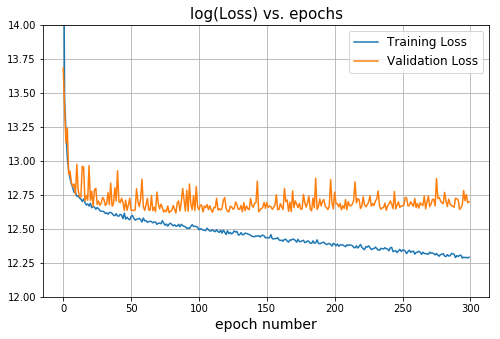

In [24]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(np.log(history.history['loss']), label='Training Loss')
ax.plot(np.log(history.history['val_loss']), label='Validation Loss')
ax.set_title("log(Loss) vs. epochs", fontsize=15)
ax.set_xlabel("epoch number", fontsize=14)
ax.legend(fontsize=12)
ax.set_ylim(12,14)
ax.grid();

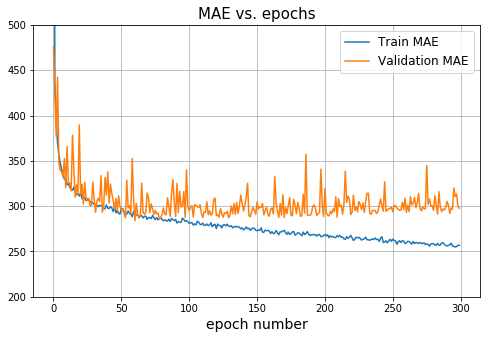

In [25]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(history.history['mean_absolute_error'], label='Train MAE')
ax.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
ax.set_title("MAE vs. epochs", fontsize=15)
ax.set_xlabel("epoch number", fontsize=14)
ax.legend(fontsize=12)
ax.set_ylim(200,500)
ax.grid();

## Early stopping

In [26]:
from keras.callbacks import EarlyStopping
early_stoping = EarlyStopping(monitor='val_mean_absolute_error',
                              min_delta=5,
                              patience=20,
                              verbose=1,
                              mode='auto')

In [27]:
nn_reg2 = Sequential()
n_hidden = 64
# hidden layers
nn_reg2.add(Dense(units=n_hidden, activation='relu', input_shape=(n_input,)))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
# output layer
nn_reg2.add(Dense(units=1, activation=None))
# compilation
nn_reg2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])

In [28]:
batch_size = 64
n_epochs = 300
history = nn_reg2.fit(X_train, y_train,
                      epochs=n_epochs,
                      batch_size=batch_size,
                      validation_split=0.1,
                      callbacks=[early_stoping])

Train on 43683 samples, validate on 4854 samples
Epoch 1/300
43683/43683 [==============================] - 1s 29us/step - loss: 3971298.1339 - mean_squared_error: 3971298.1339 - mean_absolute_error: 959.9843 - val_loss: 858543.5990 - val_mean_squared_error: 858543.5990 - val_mean_absolute_error: 470.8995
Epoch 2/300
43683/43683 [==============================] - 1s 19us/step - loss: 664843.2735 - mean_squared_error: 664843.2735 - mean_absolute_error: 426.5121 - val_loss: 606148.2268 - val_mean_squared_error: 606148.2268 - val_mean_absolute_error: 409.3287
Epoch 3/300
43683/43683 [==============================] - 1s 18us/step - loss: 498669.0013 - mean_squared_error: 498669.0013 - mean_absolute_error: 378.0779 - val_loss: 478576.7631 - val_mean_squared_error: 478576.7631 - val_mean_absolute_error: 367.9960
Epoch 4/300
43683/43683 [==============================] - 1s 18us/step - loss: 424679.5631 - mean_squared_error: 424679.5631 - mean_absolute_error: 362.5790 - val_loss: 422963.6257

43683/43683 [==============================] - 1s 17us/step - loss: 301782.7969 - mean_squared_error: 301782.7969 - mean_absolute_error: 300.9866 - val_loss: 320425.1056 - val_mean_squared_error: 320425.1056 - val_mean_absolute_error: 302.8870
Epoch 33/300
43683/43683 [==============================] - 1s 17us/step - loss: 295641.9279 - mean_squared_error: 295641.9279 - mean_absolute_error: 298.1093 - val_loss: 328895.6313 - val_mean_squared_error: 328895.6313 - val_mean_absolute_error: 309.3603
Epoch 34/300
43683/43683 [==============================] - 1s 17us/step - loss: 302079.1082 - mean_squared_error: 302079.1082 - mean_absolute_error: 302.0973 - val_loss: 318329.2932 - val_mean_squared_error: 318329.2932 - val_mean_absolute_error: 301.8723
Epoch 35/300
43683/43683 [==============================] - 1s 17us/step - loss: 295393.1662 - mean_squared_error: 295393.1662 - mean_absolute_error: 297.3713 - val_loss: 319201.0025 - val_mean_squared_error: 319201.0025 - val_mean_absolute_e

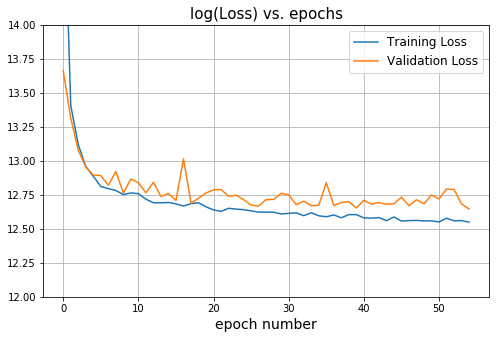

In [29]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(np.log(history.history['loss']), label='Training Loss')
ax.plot(np.log(history.history['val_loss']), label='Validation Loss')
ax.set_title("log(Loss) vs. epochs", fontsize=15)
ax.set_xlabel("epoch number", fontsize=14)
ax.legend(fontsize=12)
ax.set_ylim(12,14)
ax.grid();

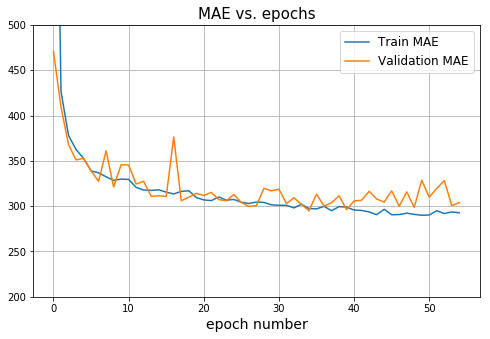

In [30]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(history.history['mean_absolute_error'], label='Train MAE')
ax.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
ax.set_title("MAE vs. epochs", fontsize=15)
ax.set_xlabel("epoch number", fontsize=14)
ax.legend(fontsize=12)
ax.set_ylim(200,500)
ax.grid();

### Dropout

In [31]:
from keras.layers import Dropout

In [42]:
nn_reg_dropout = Sequential()
n_hidden = 64
dropout_rate = 0.2

## Dropout for input layer
nn_reg_dropout.add(Dropout(rate=dropout_rate, input_shape=(n_input,)))
                   
## Now adding four hidden layers + dropout for each of them
nn_reg_dropout.add(Dense(units=n_hidden, activation='relu', input_shape=(n_input,)))
nn_reg_dropout.add(Dropout(rate=dropout_rate))
                   
nn_reg_dropout.add(Dense(units=n_hidden, activation='relu'))
nn_reg_dropout.add(Dropout(rate=dropout_rate))

nn_reg_dropout.add(Dense(units=n_hidden, activation='relu'))
nn_reg_dropout.add(Dropout(rate=dropout_rate))

nn_reg_dropout.add(Dense(units=n_hidden, activation='relu'))
nn_reg_dropout.add(Dropout(rate=dropout_rate))

nn_reg_dropout.add(Dense(units=n_hidden, activation='relu'))
nn_reg_dropout.add(Dropout(rate=dropout_rate))

nn_reg_dropout.add(Dense(units=n_hidden, activation='relu'))
nn_reg_dropout.add(Dropout(rate=dropout_rate))

nn_reg_dropout.add(Dense(units=1, activation=None))

In [43]:
nn_reg_dropout.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_14 (Dropout)         (None, 21)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 64)                1408      
_________________________________________________________________
dropout_15 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_17 (Dropout)         (None, 64)                0         
__________

In [44]:
# compilation
nn_reg_dropout.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])

In [45]:
batch_size = 64
n_epochs = 300
early_stoping = EarlyStopping(monitor='val_mean_absolute_error',
                              min_delta=5,
                              patience=40,
                              verbose=1,
                              mode='auto')

history = nn_reg_dropout.fit(X_train, y_train,
                      epochs=n_epochs,
                      batch_size=batch_size,
                      validation_split=0.1,
                      callbacks=[early_stoping])

Train on 43683 samples, validate on 4854 samples
Epoch 1/300
43683/43683 [==============================] - 3s 61us/step - loss: 7056848.1857 - mean_squared_error: 7056848.1857 - mean_absolute_error: 1530.9650 - val_loss: 1917829.4800 - val_mean_squared_error: 1917829.4800 - val_mean_absolute_error: 729.7282
Epoch 2/300
43683/43683 [==============================] - 2s 40us/step - loss: 3599152.4224 - mean_squared_error: 3599152.4224 - mean_absolute_error: 1114.1021 - val_loss: 2051929.0018 - val_mean_squared_error: 2051929.0018 - val_mean_absolute_error: 794.5413
Epoch 3/300
43683/43683 [==============================] - 2s 38us/step - loss: 2998167.5887 - mean_squared_error: 2998167.5887 - mean_absolute_error: 1009.2288 - val_loss: 1630163.3510 - val_mean_squared_error: 1630163.3510 - val_mean_absolute_error: 694.9472
Epoch 4/300
43683/43683 [==============================] - 2s 37us/step - loss: 2859841.7104 - mean_squared_error: 2859841.7104 - mean_absolute_error: 975.7311 - val_lo

43683/43683 [==============================] - 2s 36us/step - loss: 2425338.6459 - mean_squared_error: 2425338.6459 - mean_absolute_error: 869.1572 - val_loss: 2470105.6550 - val_mean_squared_error: 2470105.6550 - val_mean_absolute_error: 858.4198
Epoch 33/300
43683/43683 [==============================] - 2s 35us/step - loss: 2347324.6233 - mean_squared_error: 2347324.6233 - mean_absolute_error: 852.5272 - val_loss: 2269985.6424 - val_mean_squared_error: 2269985.6424 - val_mean_absolute_error: 790.4547
Epoch 34/300
43683/43683 [==============================] - 2s 36us/step - loss: 2375233.3865 - mean_squared_error: 2375233.3865 - mean_absolute_error: 853.6091 - val_loss: 2366680.8762 - val_mean_squared_error: 2366680.8762 - val_mean_absolute_error: 860.4680
Epoch 35/300
43683/43683 [==============================] - 2s 39us/step - loss: 2379733.7514 - mean_squared_error: 2379733.7514 - mean_absolute_error: 859.4008 - val_loss: 2192248.2843 - val_mean_squared_error: 2192248.2843 - val

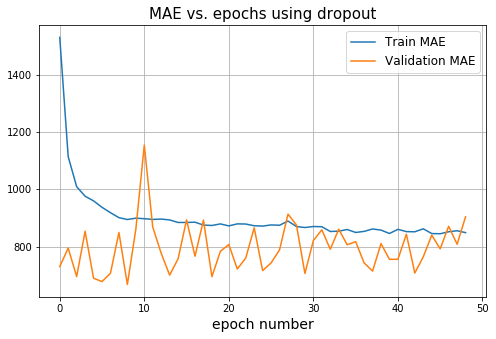

In [47]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(history.history['mean_absolute_error'], label='Train MAE')
ax.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
ax.set_title("MAE vs. epochs using dropout", fontsize=15)
ax.set_xlabel("epoch number", fontsize=14)
ax.legend(fontsize=12)
ax.grid();